##### Import Necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#reading the data
data = pd.read_csv(r"C:\Users\thars\Downloads\Netflix-Subscriptions.csv")
print(data.head())


  Time Period  Subscribers
0  01/04/2013     34240000
1  01/07/2013     35640000
2  01/10/2013     38010000
3  01/01/2014     41430000
4  01/04/2014     46130000


In [2]:
data.shape

(42, 2)

In [3]:
#let's convert the time period column to datetime 
data["Time Period"]  = pd.to_datetime(data["Time Period"], format="%d/%m/%Y")
print(data.head())

  Time Period  Subscribers
0  2013-04-01     34240000
1  2013-07-01     35640000
2  2013-10-01     38010000
3  2014-01-01     41430000
4  2014-04-01     46130000


In [4]:
# let's have a look at the quarterly subscription growth of Netflix
fig = go.Figure()

fig.add_trace(go.Scatter(x=data["Time Period"],
                         y=data["Subscribers"],
                         mode="lines", name="Subscription"))
fig.update_layout(title="Netfix Quarterly Subscription Growth",
                  xaxis_title="Date",
                  yaxis_title="Netflix Subscription")
fig.show()

In [5]:
# Now let's look at the quarterly growth rate of subscribers at Netflix
data["Quarterly Growth Rate"] = data["Subscribers"].pct_change() * 100

# Create a New column for bar color(Green for Positive, Red for Negative)
data["Bar Color"] = data["Quarterly Growth Rate"].apply(lambda x: "gold" if x>0 else "red")

# Plot the quarterly growth rate using bar graph
fig = go.Figure()
fig.add_trace(go.Bar(x=data["Time Period"],
                     y=data["Quarterly Growth Rate"],
                     marker_color=data["Bar Color"],
                     name="Quarterly Growth Rate"))
fig.update_layout(title="Netflix Quarterly Subscription Growth Rate",
                  xaxis_title="Date",
                  yaxis_title="Quarterly Growth Rate (%)")
fig.show()


In [6]:
# Now let's have a look at the yearly growth rate
data["Year"] = data["Time Period"].dt.year
yearly_growth = data.groupby("Year")["Subscribers"].pct_change().fillna(0) * 100

# Create a new column for bar color(gold for positive, red for negative)
data["Bar Color"] = yearly_growth.apply(lambda x: "gold" if x > 0 else "red")

# Plot the yearly Subscribers growth rate using bar graph
go.Figure
fig.add_trace(go.Bar(x=data["Year"],
                     y=yearly_growth,
                     marker_color=data["Bar Color"],
                     name="Yearly Growth Rate of Subscribers"))
fig.update_layout(title="Netflix Yearly Subscriber Growth Rate",
                  xaxis_title="Year",
                  yaxis_title="Yearly Growth")
fig.show()

##### Using ARIMA for Forecasting Netflix Quarterly Subscriptions

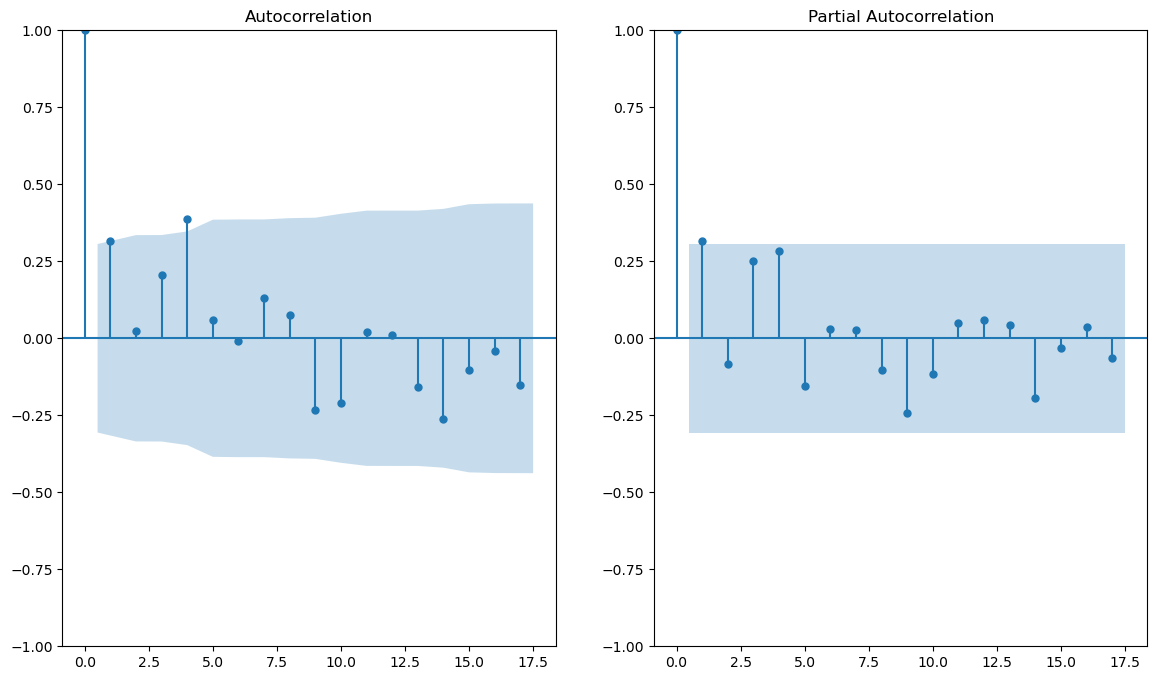

In [7]:
# let's convert the data into time series format
time_series = data.set_index("Time Period")["Subscribers"]

#Now let’s find the value of p and q by plotting the ACF and PACF of differenced time series:
differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of Differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [8]:
# Now here how to use ARIMA model
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Thu, 17 Oct 2024   AIC                           1351.986
Time:                        09:08:00   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.763      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

c:\Users\thars\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [9]:
# Now here’s how to make predictions using the trained model to forecast the number of subscribers for the next five quarters:
future_steps = 5
predictions = results.predict(len(time_series), len(time_series) + future_steps -1)
predictions = predictions.astype(int)

In [12]:
# Now let’s visualize the results of Netflix Subscriptions Forecasting for the next five quarters:
# Create Data frame with original and predictions
forecast = pd.DataFrame({"original":time_series, "predictions":predictions})

# Plot the original data and predictions
fig = go.Figure()

fig.add_trace(go.Scatter(x=forecast.index, y=forecast["original"],
                         mode="lines", name="Original"))
fig.add_trace(go.Scatter(x=forecast.index, y=forecast["predictions"],
                         mode="lines", name="predictions"))
fig.show()